In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('placement.csv')

In [9]:
df.sample(5)

,cgpa,placement_exam_marks,placed
636,6.39,43.0,1
913,6.78,7.0,1
804,6.49,81.0,0
358,6.74,52.0,0
546,6.75,18.0,1


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

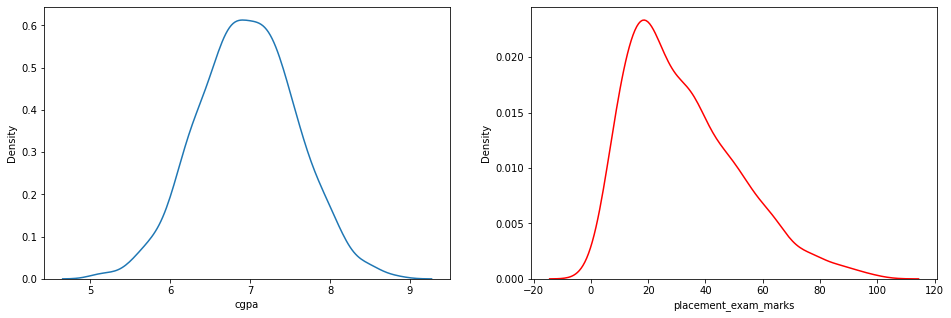

In [51]:
fig , ax = plt.subplots(ncols= 2 , figsize = (16,5))


sns.kdeplot(df['cgpa'] , ax = ax[0] )
sns.kdeplot(df['placement_exam_marks'] , ax = ax[1] , color = 'red')


In [29]:
print('Mean Value of cgpa', df['cgpa'].mean())
print('Variance Value of cgpa', df['cgpa'].var())
print('Std Value of cgpa', df['cgpa'].std())
print('Minimum Value of cgpa', df['cgpa'].min())
print('Maximum Value of cgpa', df['cgpa'].max())

Mean Value of cgpa 6.96124
Variance Value of cgpa 0.37933019259259254
Std Value of cgpa 0.6158978751323896
Minimum Value of cgpa 4.89
Maximum Value of cgpa 9.12


In [31]:
# Finding the boundary values

print('Highest allowed : ', df['cgpa'].mean() + 3* df['cgpa'].std())
print('Lowest allowed : ', df['cgpa'].mean() -  3* df['cgpa'].std())

Highest allowed :  8.808933625397168
Lowest allowed :  5.113546374602832


In [34]:
# Finding the outliers

df[(df['cgpa'] < 5.11) | (df['cgpa'] > 8.80)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [37]:
df.shape

(1000, 3)

# Trimming

In [35]:
# Trimming

new_df = df[(df['cgpa'] > 5.11) & (df['cgpa'] < 8.80)]

new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [38]:
# Approach 2 (Calculating Z Score)


df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [39]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [40]:
df[(df['cgpa_zscore'] >3) | (df['cgpa_zscore']< -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [43]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore']> -3)]

In [44]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [45]:
upper_limit = df['cgpa'].mean() + 3*(df['cgpa'].std())
lower_limit = df['cgpa'].mean() - 3*(df['cgpa'].std())

In [46]:
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [47]:
df['cgpa'] = np.where(
        df['cgpa'] >upper_limit, upper_limit,
    np.where(df['cgpa']< lower_limit , lower_limit , df['cgpa'])
)

In [49]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64